# Birth weight & its related factors Analysis

In [393]:
# Loading Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf # regression modeling

file = 'birthweight_feature_set.xlsx'
birth = pd.read_excel(file)

### Foundamental Data Exploration  

In [394]:
birth.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps',
       'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck',
       'foth', 'bwght'],
      dtype='object')

In [395]:
print(birth.head())

   mage  meduc  monpre  npvis  fage  feduc  omaps  fmaps  cigs  drink  male  \
0    69    NaN       5    2.0    62    NaN      4      7    23      9     1   
1    68   12.0       3   10.0    61   11.0      4      6    25     11     1   
2    71   12.0       3    6.0    46   12.0      2      7    21     12     1   
3    59   16.0       1    8.0    48   16.0      7      8    21     10     0   
4    48   12.0       4    6.0    39   12.0      2      9    17     13     0   

   mwhte  mblck  moth  fwhte  fblck  foth  bwght  
0      0      1     0      0      1     0    697  
1      1      0     0      1      0     0   1290  
2      0      1     0      0      1     0   1490  
3      0      0     1      0      0     1   1720  
4      1      0     0      1      0     0   1956  


In [396]:
birth.shape

(196, 18)

In [397]:
birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
mage      196 non-null int64
meduc     193 non-null float64
monpre    196 non-null int64
npvis     193 non-null float64
fage      196 non-null int64
feduc     189 non-null float64
omaps     196 non-null int64
fmaps     196 non-null int64
cigs      196 non-null int64
drink     196 non-null int64
male      196 non-null int64
mwhte     196 non-null int64
mblck     196 non-null int64
moth      196 non-null int64
fwhte     196 non-null int64
fblck     196 non-null int64
foth      196 non-null int64
bwght     196 non-null int64
dtypes: float64(3), int64(15)
memory usage: 27.6 KB


In [398]:
birth.describe().round(2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.00,193.00,196.00,193.00,196.00,189.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.91,2.34,11.60,39.29,13.85,8.19,8.96,10.93,5.40,0.55,0.27,0.38,0.35,0.35,0.34,0.31,3334.09
std,10.25,2.06,1.36,4.27,8.98,2.63,1.58,0.65,6.10,3.00,0.50,0.45,0.49,0.48,0.48,0.48,0.46,646.70
min,23.00,8.00,1.00,2.00,23.00,1.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00
25%,33.00,12.00,2.00,10.00,34.75,12.00,8.00,9.00,6.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2916.25
50%,39.00,14.00,2.00,12.00,38.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3452.00
75%,46.00,16.00,3.00,12.00,43.00,16.00,9.00,9.00,15.25,7.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3759.50
max,71.00,17.00,8.00,35.00,73.00,17.00,10.00,10.00,25.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00


### Imputing Missing Value

In [399]:
print(
      birth
      .isnull()
      .sum()
      )

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64


In [400]:
for col in birth:

    """ Create columns that are 0s if a value was not missing and 1 if
    a value is missing. """
    
    if birth[col].isnull().any():
        birth['m_'+col] = birth[col].isnull().astype(int)
        
birth.head()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,...,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc
0,69,NaN,5,2.0,62,NaN,4,7,23,9,...,0,1,0,0,1,0,697,1,0,1
1,68,12.0,3,10.0,61,11.0,4,6,25,11,...,1,0,0,1,0,0,1290,0,0,0
2,71,12.0,3,6.0,46,12.0,2,7,21,12,...,0,1,0,0,1,0,1490,0,0,0
3,59,16.0,1,8.0,48,16.0,7,8,21,10,...,0,0,1,0,0,1,1720,0,0,0
4,48,12.0,4,6.0,39,12.0,2,9,17,13,...,1,0,0,1,0,0,1956,0,0,0


##### Create a dataframe with all missing values dropped

In [401]:
df_dropped = birth.dropna()

##### For meduc, npvis, feduc:
replace missing values with median

/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


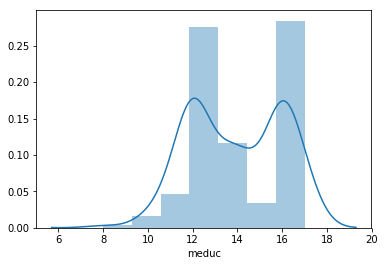

In [402]:
sns.distplot(df_dropped['meduc'])

/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


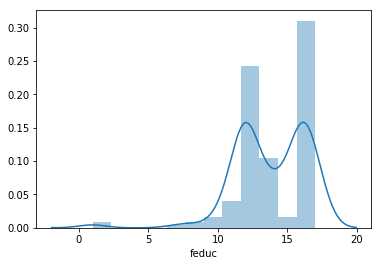

In [403]:
sns.distplot(df_dropped['feduc'])

/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


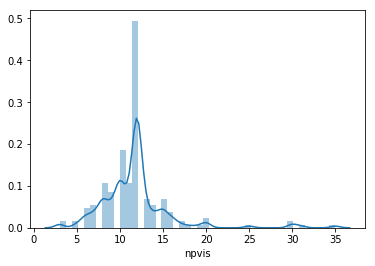

In [404]:
sns.distplot(df_dropped['npvis'])

In [405]:
fill_median = birth['meduc'].median()
birth['meduc'] = birth['meduc'].fillna(fill_median)

fill_median = birth['feduc'].median()
birth['feduc'] = birth['feduc'].fillna(fill_median)

fill_median = birth['npvis'].median()
birth['npvis'] = birth['npvis'].fillna(fill_median)

##### Check if all the missing values are replaced 

In [356]:
print(
      birth
      .isnull()
      .sum()
      )

mage       0
meduc      0
monpre     0
npvis      0
fage       0
feduc      0
omaps      0
fmaps      0
cigs       0
drink      0
male       0
mwhte      0
mblck      0
moth       0
fwhte      0
fblck      0
foth       0
bwght      0
m_meduc    0
m_npvis    0
m_feduc    0
dtype: int64


In [357]:
print(
      birth
      .isnull()
      .any()
      .any()
      )

False


### Outlier Analysis

In [358]:
birth_quantiles = birth.loc[:, :].quantile([0.20,
                                                0.40,
                                                0.60,
                                                0.80,
                                                1.00])
   
print(birth_quantiles)

     mage  meduc  monpre  npvis  fage  feduc  omaps  fmaps  cigs  drink  \
0.2  32.0   12.0     1.0    9.0  33.0   12.0    8.0    9.0   5.0    3.0   
0.4  37.0   13.0     2.0   11.0  36.0   12.0    8.0    9.0   9.0    4.0   
0.6  41.0   14.0     2.0   12.0  39.0   16.0    9.0    9.0  13.0    6.0   
0.8  48.0   16.0     3.0   13.0  45.0   16.0    9.0    9.0  16.0    8.0   
1.0  71.0   17.0     8.0   35.0  73.0   17.0   10.0   10.0  25.0   14.0   

      ...     mwhte  mblck  moth  fwhte  fblck  foth   bwght  m_meduc  \
0.2   ...       0.0    0.0   0.0    0.0    0.0   0.0  2799.0      0.0   
0.4   ...       0.0    0.0   0.0    0.0    0.0   0.0  3203.0      0.0   
0.6   ...       0.0    0.0   0.0    0.0    0.0   0.0  3629.0      0.0   
0.8   ...       1.0    1.0   1.0    1.0    1.0   1.0  3827.0      0.0   
1.0   ...       1.0    1.0   1.0    1.0    1.0   1.0  4933.0      1.0   

     m_npvis  m_feduc  
0.2      0.0      0.0  
0.4      0.0      0.0  
0.6      0.0      0.0  
0.8      0.0  

In [359]:
for col in birth:
    print(col)

mage
meduc
monpre
npvis
fage
feduc
omaps
fmaps
cigs
drink
male
mwhte
mblck
moth
fwhte
fblck
foth
bwght
m_meduc
m_npvis
m_feduc


##### Assumed Continuous/Interval Variables - 
mage
meduc
monpre
npvis
fage
feduc
omaps
fmaps
cigs
drink

##### Binary Classifiers -
male
mwhte
mblck
moth
fwhte
fblck
foth
m_meduc
m_monpre
m_npvis
m_fage
m_feduc
m_omaps
m_fmaps
m_cigs
m_drink

#### Visual EDA (Histograms)

/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


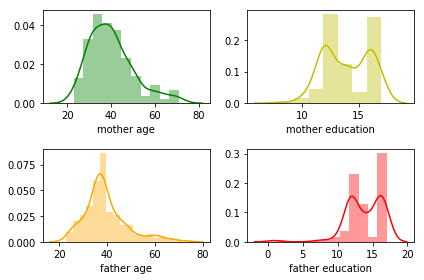

In [360]:
plt.subplot(2, 2, 1)
sns.distplot(birth['mage'],
             color = 'g')

plt.xlabel('mother age')


########################


plt.subplot(2, 2, 2)
sns.distplot(birth['meduc'],
             color = 'y')

plt.xlabel('mother education')



########################

plt.subplot(2, 2, 3)
sns.distplot(birth['fage'],
             color = 'orange')

plt.xlabel('father age')



########################

plt.subplot(2, 2, 4)
sns.distplot(birth['feduc'],
             color = 'r')

plt.xlabel('father education')


########################

plt.tight_layout()
plt.savefig('Birth weight Data Histograms 1 of 3.png')

plt.show()

/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


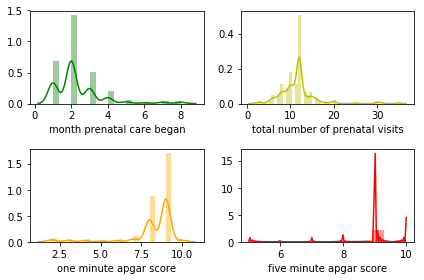

In [361]:
plt.subplot(2, 2, 1)
sns.distplot(birth['monpre'],
             color = 'g')

plt.xlabel('month prenatal care began')


########################


plt.subplot(2, 2, 2)
sns.distplot(birth['npvis'],
             color = 'y')

plt.xlabel('total number of prenatal visits')



########################

plt.subplot(2, 2, 3)
sns.distplot(birth['omaps'],
             color = 'orange')

plt.xlabel('one minute apgar score')



########################

plt.subplot(2, 2, 4)
sns.distplot(birth['fmaps'],
             color = 'r')

plt.xlabel('five minute apgar score')


########################

plt.tight_layout()
plt.savefig('Birth weight Data Histograms 2 of 3.png')

plt.show()

/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


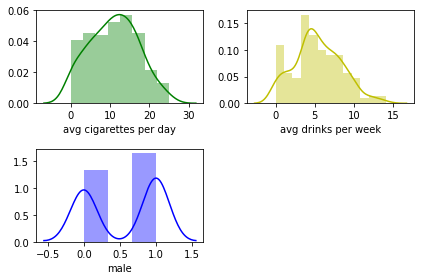

In [362]:
plt.subplot(2, 2, 1)
sns.distplot(birth['cigs'],
             color = 'g')

plt.xlabel('avg cigarettes per day')


########################


plt.subplot(2, 2, 2)
sns.distplot(birth['drink'],
             color = 'y')

plt.xlabel('avg drinks per week')


########################

plt.subplot(2, 2, 3)
sns.distplot(birth['male'],
             color = 'b')

plt.xlabel('male')

########################

plt.tight_layout()
plt.savefig('Birth weight Data Histograms 3 of 3.png')

plt.show()

/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/uieyao/anaconda3/lib/pyth

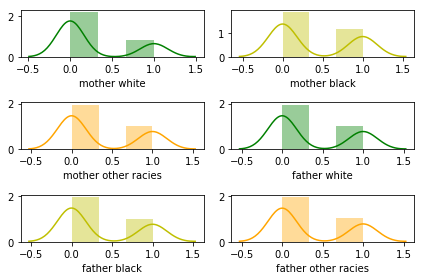

In [363]:
plt.subplot(3, 2, 1)
sns.distplot(birth['mwhte'],
             color = 'g')

plt.xlabel('mother white')


########################


plt.subplot(3, 2, 2)
sns.distplot(birth['mblck'],
             color = 'y')

plt.xlabel('mother black')


########################

plt.subplot(3, 2, 3)
sns.distplot(birth['moth'],
             color = 'orange')

plt.xlabel('mother other racies')

########################

plt.subplot(3, 2, 4)
sns.distplot(birth['fwhte'],
             color = 'g')

plt.xlabel('father white')


########################


plt.subplot(3, 2, 5)
sns.distplot(birth['fblck'],
             color = 'y')

plt.xlabel('father black')



########################

plt.subplot(3, 2, 6)
sns.distplot(birth['moth'],
             color = 'orange')

plt.xlabel('father other racies')

plt.tight_layout()
plt.savefig('Birth weight Demographic Histograms.png')

plt.show()

### Qualitative Variable Analysis (Boxplots)

In [364]:
birth_quantiles_1 = birth.loc[:, :].quantile([0.05,
                                                0.40,
                                                0.60,
                                                0.80,
                                                0.95])
print(birth_quantiles_1)

      mage  meduc  monpre  npvis   fage  feduc  omaps  fmaps  cigs  drink  \
0.05  27.0   11.0     1.0   6.00  26.00   11.0    4.0    8.0   1.0    0.0   
0.40  37.0   13.0     2.0  11.00  36.00   12.0    8.0    9.0   9.0    4.0   
0.60  41.0   14.0     2.0  12.00  39.00   16.0    9.0    9.0  13.0    6.0   
0.80  48.0   16.0     3.0  13.00  45.00   16.0    9.0    9.0  16.0    8.0   
0.95  61.0   17.0     5.0  17.25  58.25   17.0    9.0   10.0  21.0   10.0   

       ...     mwhte  mblck  moth  fwhte  fblck  foth   bwght  m_meduc  \
0.05   ...       0.0    0.0   0.0    0.0    0.0   0.0  2244.5      0.0   
0.40   ...       0.0    0.0   0.0    0.0    0.0   0.0  3203.0      0.0   
0.60   ...       0.0    0.0   0.0    0.0    0.0   0.0  3629.0      0.0   
0.80   ...       1.0    1.0   1.0    1.0    1.0   1.0  3827.0      0.0   
0.95   ...       1.0    1.0   1.0    1.0    1.0   1.0  4213.5      0.0   

      m_npvis  m_feduc  
0.05      0.0      0.0  
0.40      0.0      0.0  
0.60      0.0    

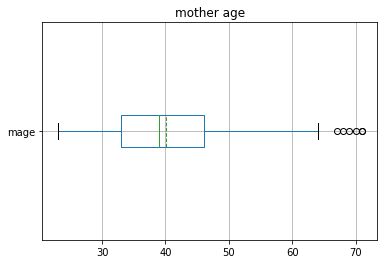

In [365]:
########################
# mage

birth.boxplot(column = ['mage'],
                vert = False,
                patch_artist = False,
                meanline = True,
                showmeans = True)

plt.title("mother age")
plt.suptitle("")

plt.show()

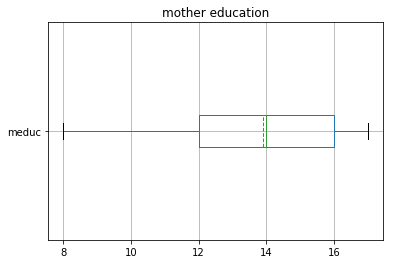

In [366]:
########################
# meduc

birth.boxplot(column = ['meduc'],
                vert = False,
                patch_artist = False,
                meanline = True,
                showmeans = True)

plt.title("mother education")
plt.suptitle("")

plt.show()

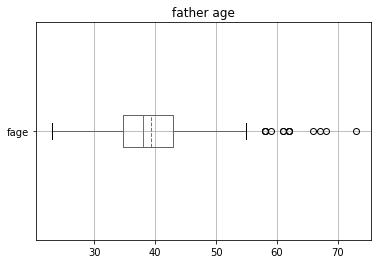

In [367]:
########################
# fage

birth.boxplot(column = ['fage'],
                vert = False,
                patch_artist = False,
                meanline = True,
                showmeans = True)

plt.title("father age")
plt.suptitle("")

plt.show()

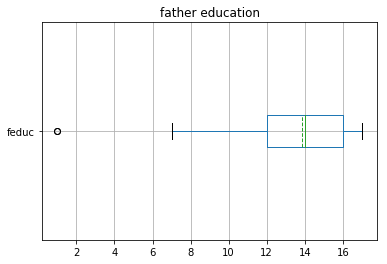

In [368]:
########################
# feduc

birth.boxplot(column = ['feduc'],
                vert = False,
                patch_artist = False,
                meanline = True,
                showmeans = True)

plt.title("father education")
plt.suptitle("")

plt.show()

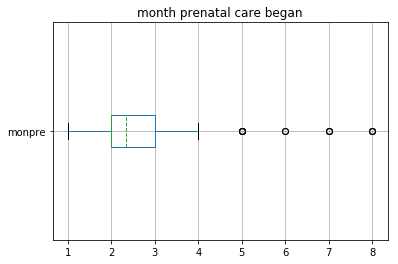

In [369]:
########################
# monpre

birth.boxplot(column = ['monpre'],
                vert = False,
                patch_artist = False,
                meanline = True,
                showmeans = True)

plt.title("month prenatal care began")
plt.suptitle("")

plt.show()

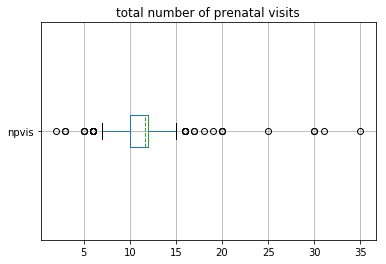

In [370]:
########################
# npvis

birth.boxplot(column = ['npvis'],
                vert = False,
                patch_artist = False,
                meanline = True,
                showmeans = True)

plt.title("total number of prenatal visits")
plt.suptitle("")

plt.show()

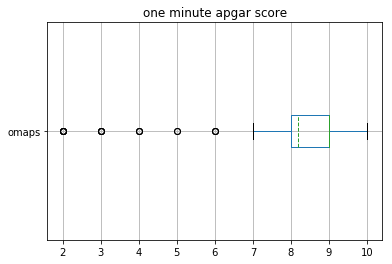

In [371]:
########################
# omaps

birth.boxplot(column = ['omaps'],
                vert = False,
                patch_artist = False,
                meanline = True,
                showmeans = True)

plt.title("one minute apgar score")
plt.suptitle("")

plt.show()

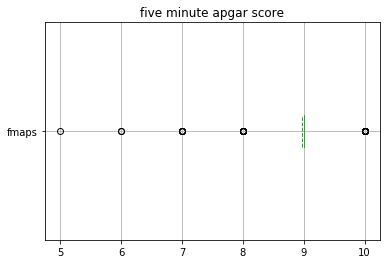

In [372]:
########################
# fmaps

birth.boxplot(column = ['fmaps'],
                vert = False,
                patch_artist = False,
                meanline = True,
                showmeans = True)

plt.title("five minute apgar score")
plt.suptitle("")

plt.show()

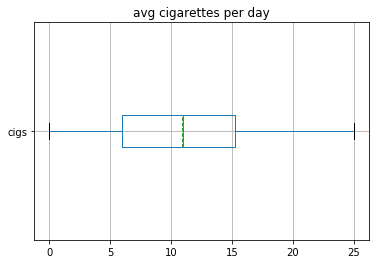

In [373]:
########################
# cigs

birth.boxplot(column = ['cigs'],
                vert = False,
                patch_artist = False,
                meanline = True,
                showmeans = True)

plt.title("avg cigarettes per day")
plt.suptitle("")

plt.show()

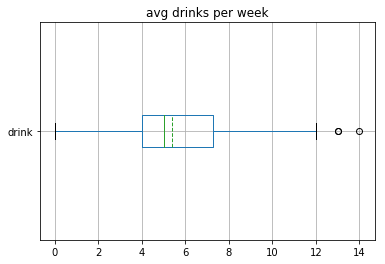

In [374]:
########################
# drink

birth.boxplot(column = ['drink'],
                vert = False,
                patch_artist = False,
                meanline = True,
                showmeans = True)

plt.title("avg drinks per week")
plt.suptitle("")

plt.show()

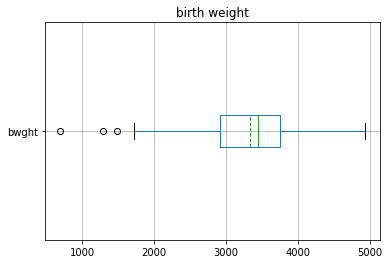

In [443]:
########################
# bwght

birth.boxplot(column = ['bwght'],
                vert = False,
                patch_artist = False,
                meanline = True,
                showmeans = True)

plt.title("birth weight")
plt.suptitle("")

plt.show()

### Tuning and Flagging Outliers

In [444]:
# Outlier flags

mage_hi = 64

fage_hi  = 55

feduc_lo = 7

monpre_hi = 4

npvis_hi = 15

npvis_lo = 7

omaps_lo = 7

fmaps_hi = 9 

fmaps_lo = 9 

drink_hi = 12

bwght_lo = 17000

##### Flagging Outlier

In [407]:
########################
# mage

birth['out_mage'] = 0


for val in enumerate(birth.loc[ : , 'mage']):
    
    if val[1] >= mage_hi:
        birth.loc[val[0], 'out_mage'] = 1

In [408]:
########################
# fage

birth['out_fage'] = 0


for val in enumerate(birth.loc[ : , 'fage']):
    
    if val[1] >= fage_hi:
        birth.loc[val[0], 'out_fage'] = 1

In [409]:
########################
# feduc

birth['out_feduc'] = 0


for val in enumerate(birth.loc[ : , 'feduc']):
    
    if val[1] <= feduc_lo:
        birth.loc[val[0], 'out_feduc'] = -1


In [410]:
########################
# monpre

birth['out_monpre'] = 0


for val in enumerate(birth.loc[ : , 'monpre']):
    
    if val[1] >= monpre_hi:
        birth.loc[val[0], 'out_monpre'] = 1

In [411]:
########################
# npvis

birth['out_npvis'] = 0


for val in enumerate(birth.loc[ : , 'npvis']):
    
    if val[1] >= npvis_hi:
        birth.loc[val[0], 'out_npvis'] = 1


for val in enumerate(birth.loc[ : , 'npvis']):
    
    if val[1] <= npvis_lo:
        birth.loc[val[0], 'out_npvis'] = -1

In [412]:
########################
# omaps

birth['out_omaps'] = 0


for val in enumerate(birth.loc[ : , 'omaps']):
    
    if val[1] <= omaps_lo:
        birth.loc[val[0], 'out_omaps'] = -1

In [413]:
########################
# fmaps

birth['out_fmaps'] = 0


for val in enumerate(birth.loc[ : , 'fmaps']):
    
    if val[1] < fmaps_lo:
        birth.loc[val[0], 'out_fmaps'] = -1
        
for val in enumerate(birth.loc[ : , 'fmaps']):
    
    if val[1] > fage_hi:
        birth.loc[val[0], 'out_fage'] = 1

In [414]:
########################
# drink

birth['out_drink'] = 0


for val in enumerate(birth.loc[ : , 'drink']):
    
    if val[1] >= drink_hi:
        birth.loc[val[0], 'out_drink'] = 1

In [445]:
########################
# bwght

birth['out_bwght'] = 0


for val in enumerate(birth.loc[ : , 'bwght']):
    
    if val[1] <= bwght_lo:
        birth.loc[val[0], 'out_bwght'] = -1


In [415]:
birth.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps',
       'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck',
       'foth', 'bwght', 'm_meduc', 'm_npvis', 'm_feduc', 'out_mage',
       'out_fage', 'out_feduc', 'out_monpre', 'out_npvis', 'out_omaps',
       'out_fmaps', 'out_drink'],
      dtype='object')

In [416]:
birth.isnull().sum()

mage          0
meduc         0
monpre        0
npvis         0
fage          0
feduc         0
omaps         0
fmaps         0
cigs          0
drink         0
male          0
mwhte         0
mblck         0
moth          0
fwhte         0
fblck         0
foth          0
bwght         0
m_meduc       0
m_npvis       0
m_feduc       0
out_mage      0
out_fage      0
out_feduc     0
out_monpre    0
out_npvis     0
out_omaps     0
out_fmaps     0
out_drink     0
dtype: int64

In [417]:
birth.to_excel('bw_feature_explored.xlsx')

### Correlation Analysis & Heatmap

In [470]:
df_corr = birth.corr().round(2)

print(df_corr)

            mage  meduc  monpre  npvis  fage  feduc  omaps  fmaps  cigs  \
mage        1.00  -0.09    0.16  -0.05  0.58  -0.09  -0.21  -0.24  0.17   
meduc      -0.09   1.00   -0.23   0.14 -0.07   0.62   0.25   0.14  0.10   
monpre      0.16  -0.23    1.00  -0.34  0.04  -0.29  -0.17  -0.08 -0.06   
npvis      -0.05   0.14   -0.34   1.00 -0.06   0.02   0.09   0.09  0.04   
fage        0.58  -0.07    0.04  -0.06  1.00  -0.01  -0.16  -0.20  0.17   
feduc      -0.09   0.62   -0.29   0.02 -0.01   1.00   0.33   0.13  0.05   
omaps      -0.21   0.25   -0.17   0.09 -0.16   0.33   1.00   0.64 -0.15   
fmaps      -0.24   0.14   -0.08   0.09 -0.20   0.13   0.64   1.00 -0.09   
cigs        0.17   0.10   -0.06   0.04  0.17   0.05  -0.15  -0.09  1.00   
drink       0.34  -0.07    0.02  -0.07  0.29  -0.12  -0.18  -0.16  0.36   
male       -0.05  -0.03   -0.08   0.00 -0.09   0.08  -0.01  -0.03 -0.12   
mwhte       0.01  -0.28    0.08   0.04  0.04  -0.41  -0.18  -0.02  0.03   
mblck      -0.02  -0.19  

In [473]:
df_corr['bwght']

mage         -0.46
meduc         0.09
monpre       -0.05
npvis         0.06
fage         -0.40
feduc         0.13
omaps         0.25
fmaps         0.25
cigs         -0.57
drink        -0.74
male          0.11
mwhte        -0.11
mblck         0.13
moth         -0.02
fwhte        -0.04
fblck         0.12
foth         -0.08
bwght         1.00
m_meduc      -0.13
m_npvis       0.06
m_feduc      -0.00
out_mage     -0.41
out_fage     -0.33
out_feduc     0.12
out_monpre   -0.04
out_npvis     0.06
out_omaps     0.25
out_fmaps     0.22
out_drink    -0.36
out_bwght      NaN
Name: bwght, dtype: float64

In [475]:
for col in birth:
    print(col)

mage
meduc
monpre
npvis
fage
feduc
omaps
fmaps
cigs
drink
male
mwhte
mblck
moth
fwhte
fblck
foth
bwght
m_meduc
m_npvis
m_feduc
out_mage
out_fage
out_feduc
out_monpre
out_npvis
out_omaps
out_fmaps
out_drink
out_bwght


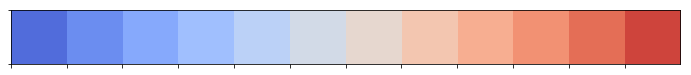

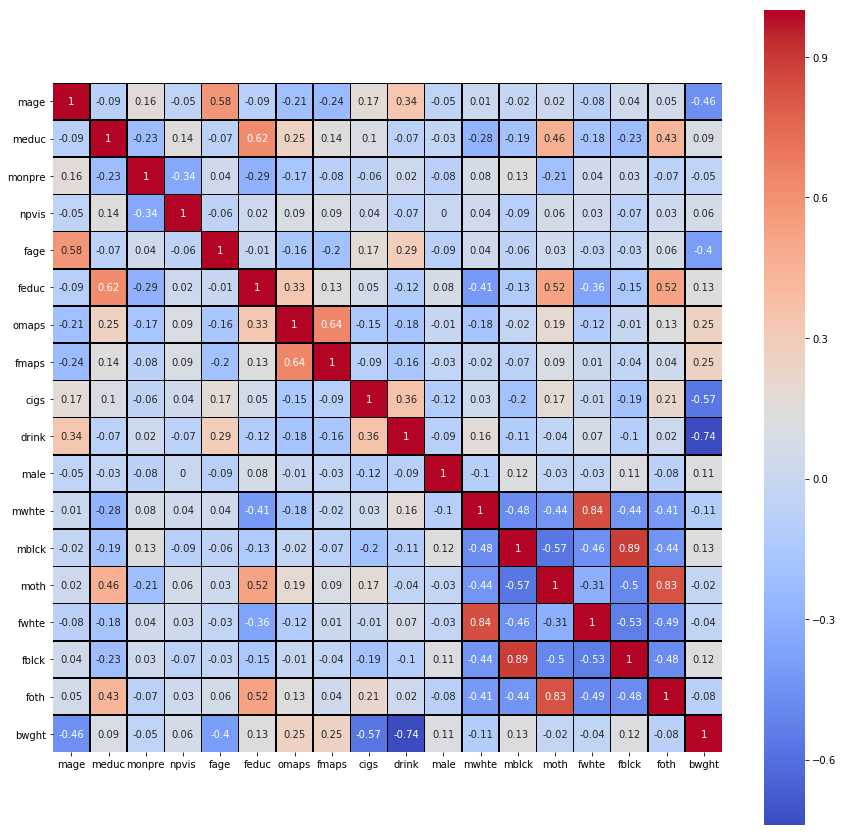

In [451]:
sns.palplot(sns.color_palette('coolwarm', 12))

fig, ax = plt.subplots(figsize=(15,15))

df_corr2 = df_corr.iloc[0:18, 0:18]

sns.heatmap(df_corr2,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)

plt.savefig('Birth weight Correlation Heatmap.png')

plt.show()

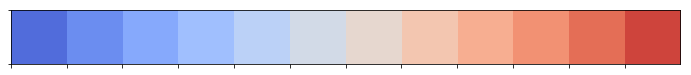

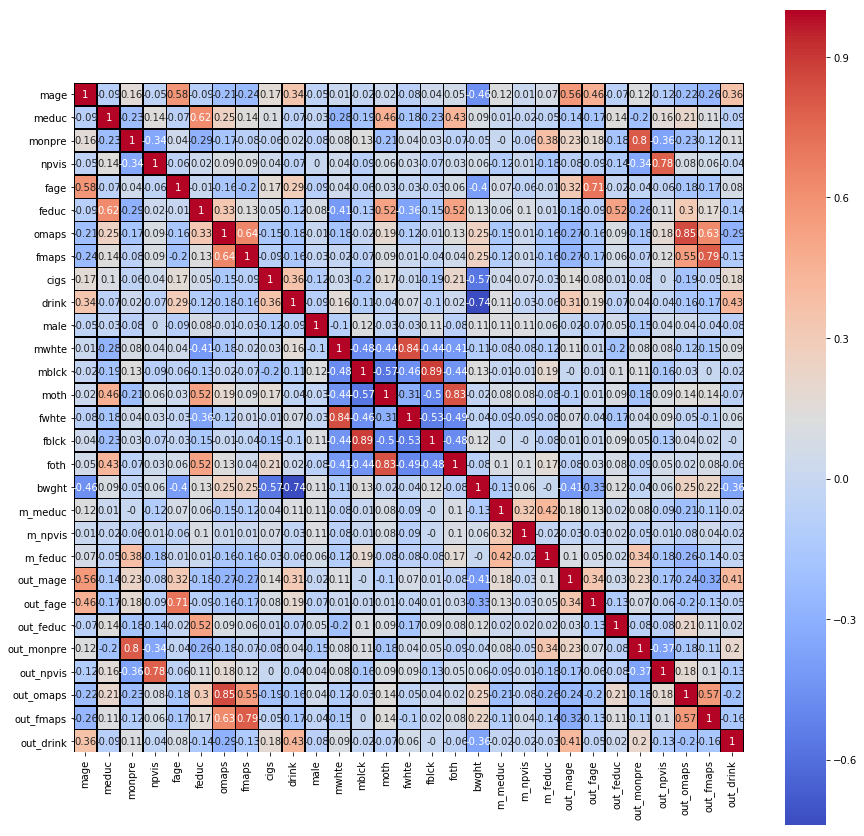

In [452]:
sns.palplot(sns.color_palette('coolwarm', 12))

fig, ax = plt.subplots(figsize=(15,15))

df_corr2 = df_corr.iloc[0:29, 0:29]

sns.heatmap(df_corr2,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)

plt.savefig('Birth weight Correlation Heatmap.png')

plt.show()




### Univariate Regression Analysis
 

In [388]:
import statsmodels.formula.api as smf # regression modeling

# Building a Regression Base
lm_bw_fmaps = smf.ols(formula = """fmaps ~ birth['bwght']""",
                         data = birth)

# Fitting Results
results = lm_bw_fmaps.fit()

# Printing Summary Statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  fmaps   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     13.16
Date:                Sat, 02 Mar 2019   Prob (F-statistic):           0.000366
Time:                        11:50:15   Log-Likelihood:                -187.18
No. Observations:                 196   AIC:                             378.4
Df Residuals:                     194   BIC:                             384.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.1179      0.238     34.

In [389]:
print(f"""
Parameters:
{results.params.round(2)}

Summary Statistics:
R-Squared:          {results.rsquared.round(3)}
Adjusted R-Squared: {results.rsquared_adj.round(3)}
""")


Parameters:
Intercept         8.12
birth['bwght']    0.00
dtype: float64

Summary Statistics:
R-Squared:          0.064
Adjusted R-Squared: 0.059



In [390]:
print(f"""
Prof. Chase:
    Although the adjusted R-Squared of {results.rsquared_adj.round(3)} is
    less than optimal, this simple model has a few advantages:
        * It is easy to interpret.
        * It can act as a base when comparing more complex models.
    
    The low metric value also indicates that our model is not overfit.
""")



Prof. Chase:
    Although the adjusted R-Squared of 0.059 is
    less than optimal, this simple model has a few advantages:
        * It is easy to interpret.
        * It can act as a base when comparing more complex models.
    
    The low metric value also indicates that our model is not overfit.



###  Full model Regression

In [453]:
lm_full = smf.ols(formula = """bwght ~ birth['mage'] +
                                           birth['meduc'] +
                                           birth['fage'] +
                                           birth['feduc'] +
                                           birth['monpre'] +
                                           birth['npvis'] +
                                           birth['omaps'] +
                                           birth['fmaps'] +
                                           birth['cigs'] +
                                           birth['drink'] +
                                           birth['fmaps'] +
                                           birth['male'] +
                                           birth['mwhte'] +
                                           birth['mblck'] +
                                           birth['moth'] +
                                           birth['fwhte'] +
                                           birth['fblck'] +
                                           birth['foth'] +
                                           birth['m_meduc'] +
                                           birth['m_npvis'] +
                                           birth['m_feduc'] +
                                           birth['out_mage'] +
                                           birth['out_fage'] +
                                           birth['out_feduc'] +
                                           birth['out_monpre'] +
                                           birth['out_npvis'] +
                                           birth['out_omaps'] +
                                           birth['out_fmaps'] +
                                           birth['out_drink'] - 1
                                           """,
                         data = birth)


# Fitting Results
results = lm_full.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     18.88
Date:                Sat, 02 Mar 2019   Prob (F-statistic):           2.07e-37
Time:                        12:38:28   Log-Likelihood:                -1412.6
No. Observations:                 196   AIC:                             2879.
Df Residuals:                     169   BIC:                             2968.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
birth['mage']          -8.5729    

In [450]:
print(f"""
Summary Statistics:
R-Squared:          {results.rsquared.round(3)}
Adjusted R-Squared: {results.rsquared_adj.round(3)}
""")



Summary Statistics:
R-Squared:          0.744
Adjusted R-Squared: 0.704



### Significant Model Regression

In [487]:
lm_s = smf.ols(formula = """bwght ~ birth['mage'] +
                                           birth['meduc'] +
                                           birth['fage'] +
                                           birth['omaps'] +
                                           birth['fmaps'] +
                                           birth['cigs'] +
                                           birth['drink'] +
                                           birth['fmaps'] +
                                           birth['mwhte'] +
                                           birth['mblck'] +
                                           birth['moth'] +
                                           birth['fwhte'] +
                                           birth['fblck'] +
                                           birth['foth'] +
                                           birth['m_meduc'] +
                                           birth['m_npvis'] +
                                           birth['m_feduc'] +
                                           birth['out_mage'] +
                                           birth['out_fage'] +
                                           birth['out_feduc'] +
                                           birth['out_omaps'] +
                                           birth['out_fmaps'] +
                                           birth['out_drink'] - 1
                                           """,
                         data = birth)


# Fitting Results
results = lm_s.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     25.20
Date:                Sat, 02 Mar 2019   Prob (F-statistic):           2.91e-41
Time:                        21:30:41   Log-Likelihood:                -1413.2
No. Observations:                 196   AIC:                             2868.
Df Residuals:                     175   BIC:                             2937.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
birth['mage']         -8.4369      3

In [459]:
print(f"""
Summary Statistics:
R-Squared:          {results.rsquared.round(3)}
Adjusted R-Squared: {results.rsquared_adj.round(3)}
""")


Summary Statistics:
R-Squared:          0.989
Adjusted R-Squared: 0.988



##### Checking predicted birth weight v. actual birth weight

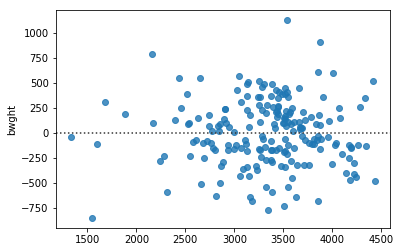

In [425]:
predict = results.predict()
y_hat   = pd.DataFrame(predict).round(2)
resids  = results.resid.round(2)

# Plotting residuals
residual_analysis = pd.concat(
        [birth.loc[:,'bwght'],
         y_hat,
         results.resid.round(2)],
         axis = 1)


residual_analysis.to_excel('birth Residuals.xlsx')


sns.residplot(x = predict,
              y = birth.loc[:,'bwght'])


plt.show()

### Generalization using Train/Test Split

In [519]:
# Importing new libraries
from sklearn.model_selection import train_test_split # train/test split
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
import statsmodels.formula.api as smf # regression modeling
import sklearn.metrics # more metrics for model performance evaluation
from sklearn.model_selection import cross_val_score # k-folds cross validation

In [520]:
birth_data   = birth.drop(['bwght'], axis =1)

In [521]:
birth_target = birth.loc[:, 'bwght']

In [522]:
X_train, X_test, y_train, y_test = train_test_split(
            birth_data,
            birth_target)


# Training set 
print(X_train.shape)
print(y_train.shape)

# Testing set
print(X_test.shape)
print(y_test.shape)


(147, 29)
(147,)
(49, 29)
(49,)


In [523]:
X_train, X_test, y_train, y_test = train_test_split(
            birth_data,
            birth_target,
            test_size = 0.1,
            random_state = 508)

# Checking shapes again.

# Training set 
print(X_train.shape)
print(y_train.shape)

# Testing set
print(X_test.shape)
print(y_test.shape)


(176, 29)
(176,)
(20, 29)
(20,)


### Forming a Machine Learning Base with KNN

In [524]:
# Step 1: Create a model object, Creating a regressor object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 1)

# Checking the type of this new object
type(knn_reg)

sklearn.neighbors.regression.KNeighborsRegressor

In [525]:
# Step 2: Teaching (fitting) the algorithm based on the training data
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=1, p=2,
          weights='uniform')

In [526]:
# Step 3: Predicting on the X_data that the model has never seen before
y_pred = knn_reg.predict(X_test)

In [527]:
# Printing out prediction values for each test observation
print(f"""
Test set predictions:
{y_pred}
""")


Test set predictions:
[3710. 4139. 2900. 3180. 3792. 3714. 3950. 2637. 2855. 3970. 3030. 2799.
 2608. 2920. 2770. 4470. 3714. 3647. 3150. 3050.]



In [528]:
# Step 4: Calling the score method, which compares the predicted values to the actual values
y_score = knn_reg.score(X_test, y_test)

# The score is directly comparable to R-Square
print(y_score)

-0.4590581986241395


##### How Many Neighbors?

In [529]:
# This is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            birth_data,
            birth_target,
            test_size = 0.10,
            random_state = 508)

In [530]:
# Creating two lists, one for training set accuracy and the other for test
# set accuracy
training_accuracy = []
test_accuracy = []

# Building a visualization to check to see  1 to 50
neighbors_settings = range(1, 51)

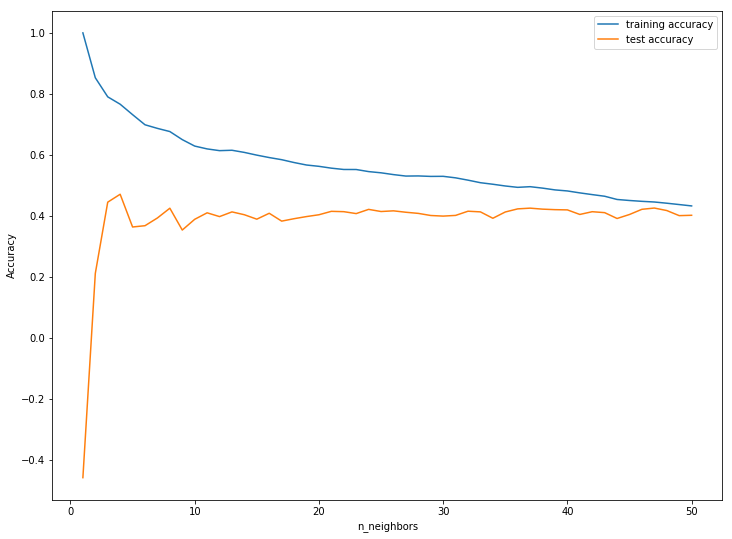

In [531]:
for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# Plotting the visualization
fig, ax = plt.subplots(figsize=(12,9))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

##### What is the optimal number of neighbors?

In [532]:
print(test_accuracy)

[-0.4590581986241395, 0.21093637950397126, 0.4446915374770653, 0.4706195914170125, 0.36327149371120826, 0.3674749594138149, 0.39286661619218, 0.4248416597161684, 0.3532486236993252, 0.38844484477596364, 0.40975416166866835, 0.39735222929245484, 0.4127703351477305, 0.4034253098242093, 0.38889497976972776, 0.4082675829686537, 0.38250073951337527, 0.39046936555877976, 0.39743995690709355, 0.40338445807375656, 0.4146096568916147, 0.4135200491047582, 0.4072066542846775, 0.4210420033188429, 0.41399459413278067, 0.4162402296477762, 0.41161702733743494, 0.40789422766994116, 0.40095867271607144, 0.3989796601949982, 0.4012347348999704, 0.4150100589057749, 0.41284780253976167, 0.39189091153896416, 0.41246264809753624, 0.422697321039748, 0.4250577485773363, 0.42180346088271287, 0.42012567473578255, 0.4193575560211772, 0.4043916081999741, 0.41339758709880925, 0.41031232685258234, 0.3911383688926905, 0.4042585067763199, 0.42126961926492335, 0.42538669226216375, 0.41722897118893604, 0.400494772009317

The best results occur when k = 3

In [533]:
print("The optimal number of neighbors is", \
      test_accuracy.index(max(test_accuracy)), \
      "with an optimal score of", \
      max(test_accuracy))

The optimal number of neighbors is 3 with an optimal score of 0.4706195914170125


The optimal results occur when k = 3. Let's build a model based on this information.

In [534]:
# Building a model with k = 3
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 3)

# Fitting the model based on the training data
knn_reg.fit(X_train, y_train)

# Scoring the model
y_score = knn_reg.score(X_test, y_test)

# The score is directly comparable to R-Square
print(y_score)

0.4446915374770653


In [535]:
print(f"""
Our base to compare other models is {y_score.round(3)}.
    
This base helps us evaluate more complicated models and lets us consider
tradeoffs between accuracy and interpretability.
""")


Our base to compare other models is 0.445.
    
This base helps us evaluate more complicated models and lets us consider
tradeoffs between accuracy and interpretability.



### OLS Regression Analysis in statsmodels

In [442]:
X_train, X_test, y_train, y_test = \
    train_test_split(birth_data,
                     birth_target,
                     test_size = 0.10,
                     random_state = 508)


# We need to merge our X_train and y_train sets so that they can be
# used in statsmodels
birth_train = pd.concat([X_train, y_train], axis = 1)

In [538]:
# Step 1: Build the model
lm_train = smf.ols(formula = """bwght ~
                                     birth_train[['mage',
                                'meduc',
                                'fage',
                                'omaps',
                                'fmaps',
                                'cigs',
                                'drink',
                                'fmaps',
                                'mwhte',
                                'mblck',
                                'moth',
                                'fwhte',
                                'fblck',
                                'foth',
                                'm_meduc',
                                'm_npvis',
                                'm_feduc',
                                'out_mage',
                                'out_fage',
                                'out_feduc',
                                'out_omaps',
                                'out_fmaps',
                                'out_drink']]""",
                         data = birth_train)

# Step 2: Fit the model based on the data
results = lm_train.fit()
# Step 3: Analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     23.14
Date:                Sat, 02 Mar 2019   Prob (F-statistic):           1.07e-36
Time:                        21:51:13   Log-Likelihood:                -1270.3
No. Observations:                 176   AIC:                             2583.
Df Residuals:                     155   BIC:                             2649.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                                                  

#### Once we are staisfied with our model that has been build in statsmodels, we can rebuild it in scikit-learn. The major advantage of this is that it is incredibly easy to build and compare different model types in scikit-learn.



### Applying the Optimal Model in scikit-learn

In [512]:
birth_data.isnull().sum()

mage         0
meduc        0
fage         0
omaps        0
fmaps        0
cigs         0
drink        0
fmaps        0
mwhte        0
mblck        0
moth         0
fwhte        0
fblck        0
foth         0
m_meduc      0
m_npvis      0
m_feduc      0
out_mage     0
out_fage     0
out_feduc    0
out_omaps    0
out_fmaps    0
out_drink    0
dtype: int64

In [539]:
# Preparing a DataFrame based the the analysis above
birth_data     =   birth.loc[:,['mage',
                                'meduc',
                                'fage',
                                'omaps',
                                'fmaps',
                                'cigs',
                                'drink',
                                'fmaps',
                                'mwhte',
                                'mblck',
                                'moth',
                                'fwhte',
                                'fblck',
                                'foth',
                                'm_meduc',
                                'm_npvis',
                                'm_feduc',
                                'out_mage',
                                'out_fage',
                                'out_feduc',
                                'out_omaps',
                                'out_fmaps',
                                'out_drink']]

# Preparing the target variable
birth_target = birth.loc[:, 'bwght']


# Running train/test split
X_train, X_test, y_train, y_test = \
    train_test_split(birth_data,
                     birth_target,
                     test_size = 0.10,
                     random_state = 508)


### Using KNN  on the optimal model (same code as before)

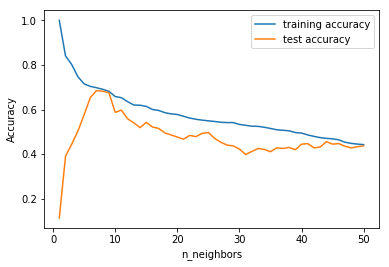

In [540]:
# Exact loop as before
training_accuracy = []
test_accuracy = []



neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))



plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [541]:
print("The optimal number of neighbors is", \
      test_accuracy.index(max(test_accuracy)), \
      "with an optimal score of", \
      max(test_accuracy))

The optimal number of neighbors is 6 with an optimal score of 0.6849808921865835


### Building a KNN model based on above


In [542]:
# Building a model with k = 6
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 6)


# Fitting the model based on the training data
knn_reg_fit = knn_reg.fit(X_train, y_train)


# Scoring the model
y_score_knn_optimal = knn_reg.score(X_test, y_test)


# The score is directly comparable to R-Square
print(y_score_knn_optimal)


# Generating Predictions based on the optimal KNN model
knn_reg_optimal_pred = knn_reg_fit.predict(X_test)

0.6540058978024936


In [543]:
print(y_score_knn_optimal)

0.6540058978024936


### 2.5 Does OLS Regression predict better than KNN?

In [544]:
X_train, X_test, y_train, y_test = \
    train_test_split(birth_data,
                     birth_target,
                     test_size = 0.25,
                     random_state = 508)

In [545]:
from sklearn.linear_model import LinearRegression

In [546]:
# Prepping the Model
lr = LinearRegression(fit_intercept = False)


# Fitting the model
lr_fit = lr.fit(X_train, y_train)


# Predictions
lr_pred = lr_fit.predict(X_test)

# Scoring the model
y_score_ols_optimal = lr_fit.score(X_test, y_test)


# The score is directly comparable to R-Square
print(y_score_ols_optimal)

0.4255722218975961


In [547]:
print(f"""
Test set predictions:
{lr_pred.round(2)[1:19]}
""")


Test set predictions:
[4253.33 3136.92 3482.31 2483.91 3919.09 3594.99 3401.41 3756.51 3566.02
 2745.24 3475.55 2631.66 2814.07 3310.62 4182.46 3460.93 3365.89 3184.91]



In [548]:
print(f"""
Full model KNN score:    {y_score.round(3)}
Optimal model KNN score: {y_score_knn_optimal.round(3)}
Optimal model OLS score: {y_score_ols_optimal.round(3)}
""")


Full model KNN score:    0.445
Optimal model KNN score: 0.654
Optimal model OLS score: 0.426



### 2.6 Outputting Coefficients, Predictions, and Other Metrics for Our Most Predictive Model

In [549]:
# What does our leading model look like?
pd.DataFrame(list(zip(birth_data.columns, lr.coef_)))


# How well are we predicting on each observation?
pd.DataFrame(list(zip(y_test, lr_pred))).head(n = 10)

,0,1
0,3459,3612.385475
1,3810,4253.328890
2,3000,3136.917617
3,3685,3482.311746
4,2544,2483.913949
5,4050,3919.087089
6,3320,3594.988508
7,3490,3401.407317
8,3657,3756.512118
9,2770,3566.017478


In [550]:
# R-Square (same as the score above)
lr_rsq = sklearn.metrics.r2_score(y_test, lr_pred)

print(lr_rsq.round(3))

0.426


In [551]:
# Mean Squared Error
lr_mse = sklearn.metrics.mean_squared_error(y_test, lr_pred)

print(lr_mse.round(3))

129638.602


In [552]:
# Root Mean Squared Error (how far off are we on each observation?)
lr_rmse = pd.np.sqrt(lr_mse)
print(lr_rmse.round(3))

360.054


### 2.7 Cross-Validation Using K-Folds
Cross-validation is a great way to further ensure that your model generalizes well on new data. When using k-folds, make sure you have at least 50 observations per feature, per fold:

    50 * number of features * number of folds

For example, if you have a model with 5 features and would like to cross-validate it using 10 folds, you will need a minimum of 50 5 10, or 2500 observations.

This rule will prove more valuable as we move into more advanced modeling techniques.

In [554]:
print(f"""
We have a total of {birth_data.shape[0]}, and we are using {birth_data.shape[1]} features.

That means we have room for {round(birth_data.shape[0] / (50 * birth_data.shape[1]), 0)} fold(s).
""")


We have a total of 196, and we are using 23 features.

That means we have room for 0.0 fold(s).



##### Cross-validation with 3 folds

In [556]:
cv_lr_3 = cross_val_score(lr,
                          birth_data,
                          birth_target,
                          cv = 3)

print(cv_lr_3)

[-1.96721772 -5.28374744 -1.41921016]


In [557]:
print(pd.np.mean(cv_lr_3).round(3))

-2.89


##### Cross-validation with 5 folds

In [558]:
cv_lr_5 = cross_val_score(lr,
                          birth_data,
                          birth_target,
                          cv = 5)

print(cv_lr_5)

[ -1.1655838  -16.82432419 -10.68839982 -33.01648375  -1.59982051]


In [559]:
print(pd.np.mean(cv_lr_5).round(3))

-12.659


##### Cross-validation with 10 folds

In [560]:
cv_lr_10 = cross_val_score(lr,
                           birth_data,
                           birth_target,
                           cv = 10)

print(cv_lr_10)

[  -0.98166964  -30.66800625  -80.55391786  -26.84729409  -14.45229027
 -127.27507023  -53.15861324 -120.96112704 -100.20677943   -2.80552523]


In [561]:
print(pd.np.mean(cv_lr_10).round(3))

-55.791





If we would like to use more folds for cross-validation, we should consider reducing the number of features in our model. This is a concept known as parsimony. Parsimonous (smaller) models allow for more thorough cross-validation, which helps us ensure that when we launch our model into a live environment, it performs as expected. The tradeoff is that parsimonous models tend to be less predictive.

Cross-validation can also be process-intense. We can use %timeit to analyze this further.

In [562]:
%timeit cross_val_score(lr, birth_data, birth_target, cv = 3)

10.9 ms ± 1.47 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [563]:
%timeit cross_val_score(lr, birth_data, birth_target, cv = 5)

15.6 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [564]:
%timeit cross_val_score(lr, birth_data, birth_target, cv = 10)

31.2 ms ± 4.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
